In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[1] # Java_nio: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



['32', '20', '18', '27', '9', '0', '11', '7', '29', '16', '6', '28', '17', '1', '10', '19', '26', '8', '21', '31', '30', '24', '23', '4', '15', '3', '12', '2', '13', '5', '14', '22', '25']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model JavaNioServerSocket3: 14 of 33 = 42.42424242424242%
mutation score for rand_loop in model JavaNioServerSocket3: 13 of 33 = 39.39393939393939%
mutation score for bes_no_loop in model JavaNioServerSocket3: 12 of 33 = 36.36363636363637%
mutation score for rand_no_loop in model JavaNioServerSocket3: 14 of 33 = 42.42424242424242%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

title = f"The different algorithms' performance on killed mutant for {model_name_to_view_list[1]}"

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 18
    ,
    'fig_hight' : 7,
    'x_lim' : 25,
    'y_lim' : 200,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
#     'title': f"The different algorithms' performance on killed mutant for {model_name_to_view_list[1]}",
    
    'bes_l_label': 'BESL',
    'random_l_label': 'RS (cor. to BESL)',
    'bes_no_l_label': 'BESnL',
    'random_no_l_label': 'RS (cor. to BESnL)' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




labels: ['0', '2', '4', '7', '9', '11', '12', '15', '18', '19', '21', '23', '26', '27', '6', '28']
mutant 6 not_found
mutant 28 not_found
mutant 9 not_found
mutant 15 not_found
mutant 28 not_found
mutant 2 not_found
mutant 15 not_found
mutant 26 not_found
mutant 6 not_found
mutant 15 not_found
mutant 28 not_found
over_bound_list: ({('12', 204, 1, 93, 1), ('2', 188, 1, 0, 1), ('26', 188, 1, 0, 1), ('28', 0, 0, 4959, 0), ('9', 7365, 0, 3853, 11), ('15', 640, 0, 0, 0)}, {'2', '12', '9', '28', '26', '15'})
*****************************
\begin{table}[actual_tests]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
12 & 204    & 1         & 93       & 1          \\ \hline
2 & 188    & 1         & TIMEOUT       & 1          \\ \hline
26 & 188    & 1         & TIMEOUT       & 1          \\ \hline
28 & TIMEOUT    & TIMEOUT         & 4959       & TIMEOUT          \\ \hline
9 & 7365    & TIMEOUT         & 3853       & 11      

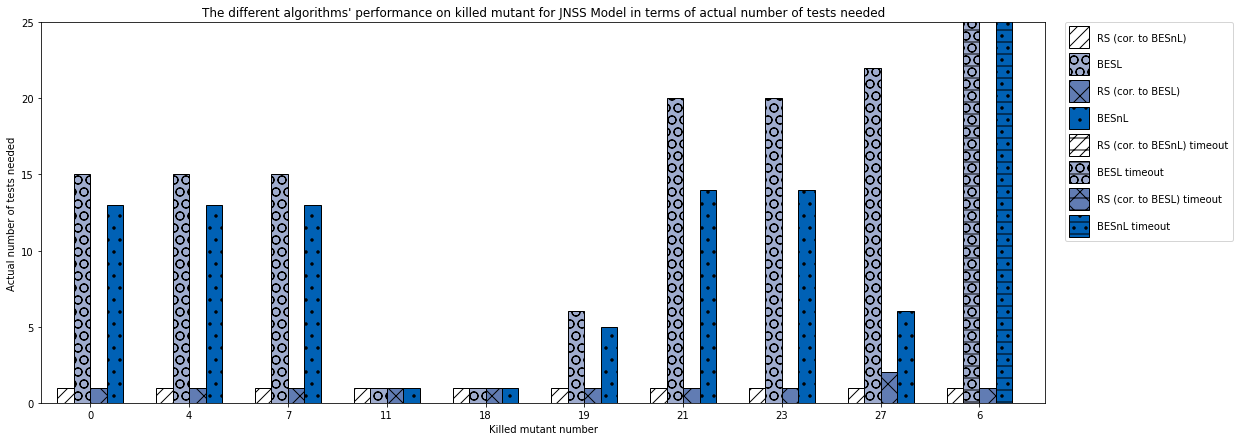

In [5]:

#################################
## Manually:
#################################

# actual_size

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]  # +6 +31
extras = np.array([6, 28])
desired_mutants  = np.append(desired_mutants, extras)
desired_mutants = desired_mutants.tolist()


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

# latex.....
over_bound_list = get_over_bound_element(c_lists, desired_mutants, 100)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists



d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria
d_map['x_lim'] = 29
d_map['y_lim'] = 25
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"

plot_4_bars(labels, c_lists, d_map)


old_labels: ['0', '2', '4', '7', '9', '11', '12', '15', '18', '19', '21', '23', '26', '27', '6', '28']
mutant 6 not_found
mutant 28 not_found
mutant 9 not_found
mutant 15 not_found
mutant 28 not_found
mutant 2 not_found
mutant 15 not_found
mutant 26 not_found
mutant 6 not_found
mutant 15 not_found
mutant 28 not_found
over_bound_list: ({('9', 15.532056093215942, 0, 18.335301876068115, 1.9568288326263428), ('28', 0, 0, 28.709747791290283, 0)}, {'9', '28'})
*****************************
\begin{table}[time_taken]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
9 & 15.532056093215942    & TIMEOUT         & 18.335301876068115       & 1.9568288326263428          \\ \hline
28 & TIMEOUT    & TIMEOUT         & 28.709747791290283       & TIMEOUT          \\ \hline
\end{tabular}
\end{table}
*****************************

labels: ['0', '2', '4', '7', '11', '12', '15', '18', '19', '21', '23', '26', '27', '6']
mutant 6 not_foun

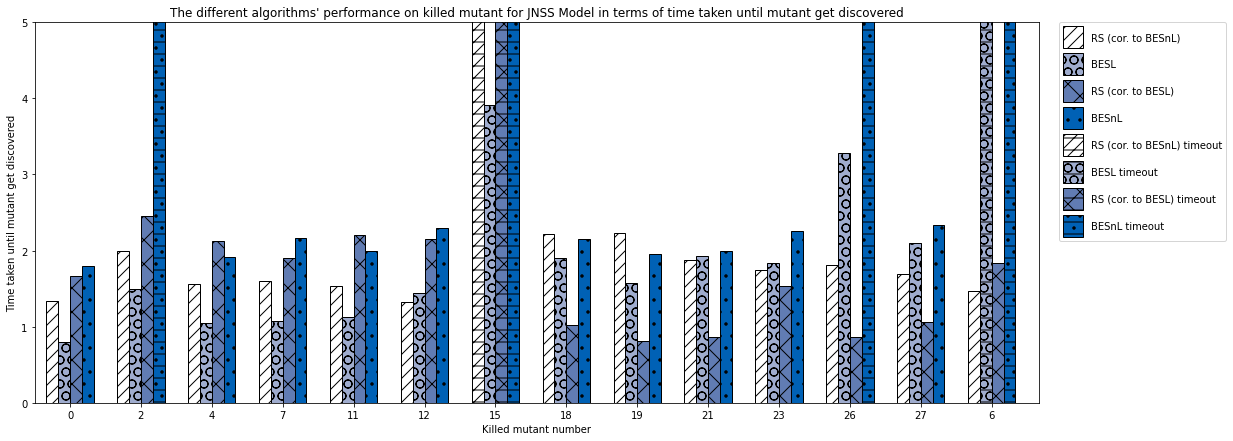

In [6]:
# time_requierd

# desired_mutants = m_lists[0]
labels = desired_mutants
print(f'old_labels: {labels}')



creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists


# latex.....
over_bound_list = get_over_bound_element(c_lists, desired_mutants, 15)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists



d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 41
d_map['y_lim'] = 5
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"

plot_4_bars(labels, c_lists, d_map)



mutant 6 not_found
mutant 28 not_found
mutant 2 not_found
mutant 15 not_found
mutant 26 not_found
mutant 6 not_found


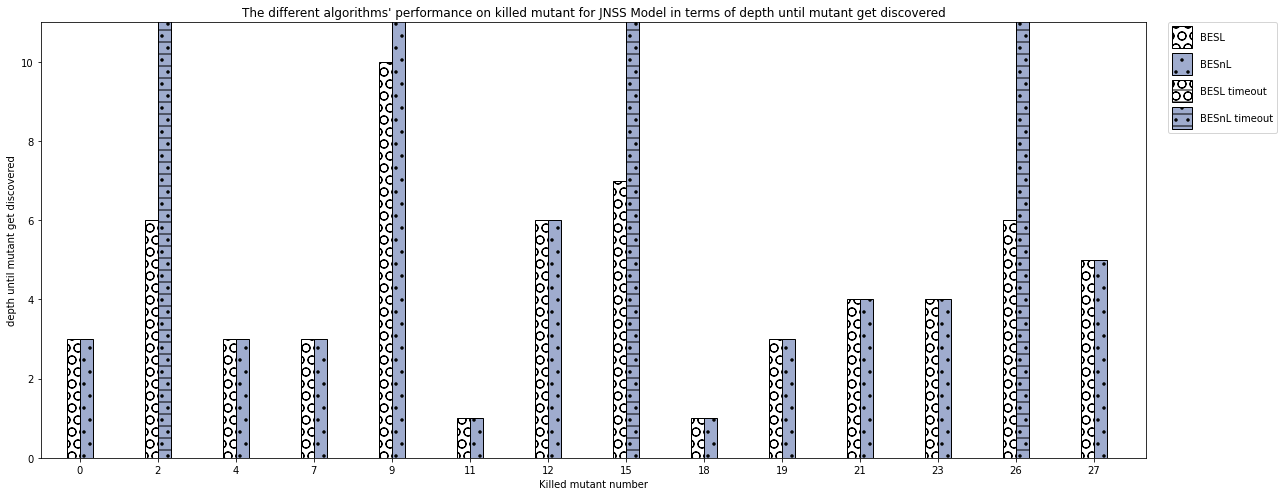

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "depth until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 11
d_map['title'] = f"{title} in terms of {d_map['y_label'].lower()}"


labels = desired_mutants
plot_2_bars(labels, c_lists, d_map)

